# Wikipedia Notable Life Expectancies
# [Notebook 10: Data Pre-processing ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_preproc_2022_10_06.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_train.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 78040 rows and 28 columns.


,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,", 73, British Anglican prelate, Bishop of Tonbridge.",https://en.wikipedia.org/wiki/David_Bartleet,4,2002,NaN,73.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,1,0,0,0,0,0,0,0,0,1,5329.000,0.250,8,64,Europe,No Prior Region,spiritual
1,", 90, American radiologist and university professor.",https://en.wikipedia.org/wiki/Eugene_Saenger,3,2007,NaN,90.000,NaN,United States of America,NaN,1,0,0,1,0,0,0,0,0,0,0,2,8100.000,0.333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
78038,", 74, Canadian journalist and author.",https://en.wikipedia.org/wiki/Charles_Lynch_(journalist),7,1994,NaN,74.000,NaN,Canada,NaN,0,0,0,0,0,1,0,0,0,0,0,1,5476.000,0.143,0,0,North America,No Prior Region,arts
78039,", 92, English cricketer and squash player.",https://en.wikipedia.org/wiki/Edward_Harrison_(cricketer),5,2002,NaN,92.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,0,0,0,1,0,0,0,0,1,8464.000,0.200,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
36651,", 82, American gridiron football player, complications from pneumonia.",https://en.wikipedia.org/wiki/Andy_Dudish,5,2001,NaN,82.000,complications from pneumonia,United States of America,NaN,0,0,0,0,0,0,1,0,0,0,0,1,6724.000,0.200,7,49,North America,No Prior Region,sports
15760,", 83, German princess.",https://en.wikipedia.org/wiki/Princess_Iniga_of_Thurn_and_Taxis,5,2008,NaN,83.000,NaN,Germany,NaN,0,0,0,0,0,0,0,0,1,0,0,1,6889.000,0.200,14,196,Europe,No Prior Region,politics_govt_law
63939,", 69, American politician from Texas, cancer.",https://en.wikipedia.org/wiki/Bob_Bullock,5,1999,NaN,69.000,cancer,United States of America,NaN,0,0,0,0,0,0,0,0,1,0,0,1,4761.000,0.200,5,25,North America,No Prior Region,politics_govt_law
40495,", 60, Venezuelan lawyer and politician, president of the Chamber of Deputies .",https://en.wikipedia.org/wiki/Ixora_Rojas_Paz,4,2016,1998 1999,60.000,NaN,Venezuela,NaN,0,0,0,0,0,0,0,0,1,0,0,1,3600.000,0.250,22,484,South America,No Prior Region,politics_govt_law
60712,", 75, American politician, member of the Tennessee Senate .",https://en.wikipedia.org/wiki/Bobby_Carter,6,2015,1995 2002,75.000,NaN,United States of America,NaN,0,0,0,0,0,0,0,0,1,0,0,1,5625.000,0.167,21,441,North America,No Prior Region,politics_govt_law


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78040 entries, 0 to 78039
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   info                       78040 non-null  object 
 1   link                       78040 non-null  object 
 2   num_references             78040 non-null  int64  
 3   year                       78040 non-null  int64  
 4   info_parenth               26884 non-null  object 
 5   age                        78040 non-null  float64
 6   cause_of_death             26604 non-null  object 
 7   place_1                    77919 non-null  object 
 8   place_2                    4339 non-null   object 
 9   sciences                   78040 non-null  int64  
 10  social                     78040 non-null  int64  
 11  spiritual                  78040 non-null  int64  
 12  academia_humanities        78040 non-null  int64  
 13  business_farming           78040 non-null  int

<IPython.core.display.Javascript object>

In [6]:
# Checking sum of null values by column
df.isnull().sum()

info                             0
link                             0
num_references                   0
year                             0
info_parenth                 51156
age                              0
cause_of_death               51436
place_1                        121
place_2                      73701
sciences                         0
social                           0
spiritual                        0
academia_humanities              0
business_farming                 0
arts                             0
sports                           0
law_enf_military_operator        0
politics_govt_law                0
crime                            0
event_record_other               0
num_categories                   0
age_sqrd                         0
recip_num_references             0
years                            0
years_sqrd                       0
region                         121
prior_region                     0
known_for                      378
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
df.columns

Index(['info', 'link', 'num_references', 'year', 'info_parenth', 'age',
       'cause_of_death', 'place_1', 'place_2', 'sciences', 'social',
       'spiritual', 'academia_humanities', 'business_farming', 'arts',
       'sports', 'law_enf_military_operator', 'politics_govt_law', 'crime',
       'event_record_other', 'num_categories', 'age_sqrd',
       'recip_num_references', 'years', 'years_sqrd', 'region', 'prior_region',
       'known_for'],
      dtype='object')

<IPython.core.display.Javascript object>

## Data Pre-processing
- There are 77,342 rows and 27 columns in the `train` set.
- We will need to typecast our categorical columns again.
- At the outset, we can drop the following columns:
    - `cause_of_death`
    - `place_1`
    - `place_2`
- Most likely, we will not be using the individual `known for` category columns again, but we will retain them, just in case.
- After outlier detection is complete, we can drop `info`, `info_parenth`, and `link` columns.
- The missing values for `region` will need treatment.

#### Dropping Unnecessary Columns

In [8]:
# Dropping unnecessary columns
cols_to_drop = [
    "cause_of_death",
    "place_1",
    "place_2",
]
df.drop(cols_to_drop, axis=1, inplace=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 78040 rows and 25 columns.


<IPython.core.display.Javascript object>

#### Typecasting Categorical Columns

In [9]:
# Typecasting categorical columns
cols_to_cast = ["region", "prior_region", "known_for"]
df[cols_to_cast] = df[cols_to_cast].astype("category")

<IPython.core.display.Javascript object>

#### Confirming Updated Columns

In [10]:
# Recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78040 entries, 0 to 78039
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       78040 non-null  object  
 1   link                       78040 non-null  object  
 2   num_references             78040 non-null  int64   
 3   year                       78040 non-null  int64   
 4   info_parenth               26884 non-null  object  
 5   age                        78040 non-null  float64 
 6   sciences                   78040 non-null  int64   
 7   social                     78040 non-null  int64   
 8   spiritual                  78040 non-null  int64   
 9   academia_humanities        78040 non-null  int64   
 10  business_farming           78040 non-null  int64   
 11  arts                       78040 non-null  int64   
 12  sports                     78040 non-null  int64   
 13  law_enf_military_operator  7804

<IPython.core.display.Javascript object>

## Outlier Detection and Treatment

#### Function to View Outliers for Each Predictor Column

In [11]:
# Define a function that returns new dataframe of count and percentage of outliers of input dataframe columns
def outside_IQRends_pls1pt5(dataframe):
    """
    Takes input numeric dataframe and returns a dataframe of the column count 
    and percentage of values that are outliers, defined by 
    x < (Q1 - 1.5*IQR) ∪ (Q3 + 1.5*IQR) > x, where x is the value of the outlier.

    """
    count_lst = []
    perc_lst = []

    for column in dataframe:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        count = len(
            dataframe[
                (dataframe[column] < lower_whisker)
                | (dataframe[column] > upper_whisker)
            ]
        )
        percentage = round(count / len(dataframe[column]) * 100, 2)

        count_lst.append(count)
        perc_lst.append(percentage)

    outlier_dict = {"outlier_count": count_lst, "percentage_outliers": perc_lst}

    return pd.DataFrame(data=outlier_dict, index=dataframe.columns).sort_values(
        by="outlier_count", ascending=False
    )

<IPython.core.display.Javascript object>

#### Visualization of outliers

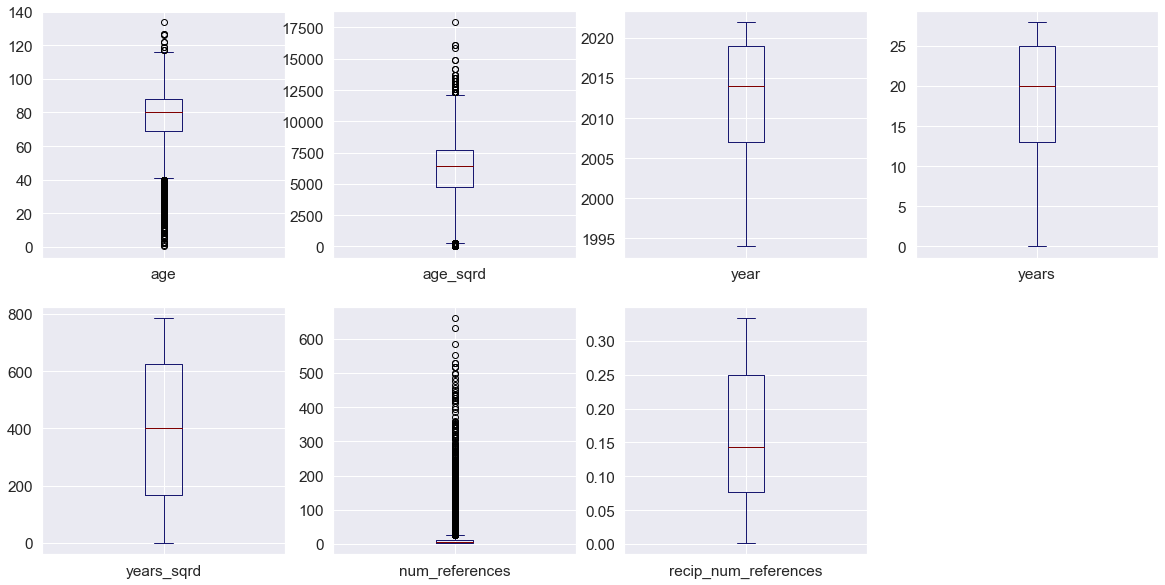

,outlier_count,percentage_outliers
num_references,6749,8.650
age,3267,4.190
age_sqrd,156,0.200
year,0,0.000
years,0,0.000
years_sqrd,0,0.000
recip_num_references,0,0.000


<IPython.core.display.Javascript object>

In [12]:
# Boxplots of numerical features to view outliers
columns = [
    "age",
    "age_sqrd",
    "year",
    "years",
    "years_sqrd",
    "num_references",
    "recip_num_references",
]
df[columns].plot.box(subplots=True, figsize=(20, 10), layout=(2, 4))
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[columns])

#### Observations:
- The target, `age`, has at least one upper-end outlier and numerous lower-end outliers. while its squared transformation, `age_sqrd` has only upper-end outliers.
- In general, we would not treat the target's outliers.  However, we will examine the most extreme upper value that does not follow the trend in the data.

#### Examining the Upper End Outliers for Target `age`

In [14]:
# Checking uppermost outlier for age
df[(df["age"] > 115)]

,info,link,num_references,year,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
3580,", 116, American supercentenarian, world's oldest living person.",https://en.wikipedia.org/wiki/Jeralean_Talley,14,2015,NaN,116.000,0,0,0,0,0,0,0,0,0,0,1,1,13456.000,0.071,21,441,North America,No Prior Region,NaN
14320,", 134?, Uzbekistani longevity claimant, unverified world's oldest person.",https://en.wikipedia.org/wiki/Tuti_Yusupova,5,2015,NaN,134.000,0,0,0,0,0,0,0,0,0,0,1,1,17956.000,0.200,21,441,Central Asia,No Prior Region,NaN
14940,", 127?, Chinese unverified claimant for world's oldest person, natural causes.",https://en.wikipedia.org/wiki/Luo_Meizhen,11,2013,NaN,127.000,0,0,0,0,0,0,0,0,0,0,1,1,16129.000,0.091,19,361,Asia,No Prior Region,NaN
15648,", 116, Ecuadorian supercentenarian, oldest person in the world, pneumonia.",https://en.wikipedia.org/wiki/Mar%C3%ADa_Capovilla,6,2006,NaN,116.000,0,0,0,0,0,0,0,0,0,0,1,1,13456.000,0.167,12,144,South America,No Prior Region,NaN
16995,", 116, Japanese supercentenarian, verified oldest man in history, oldest verified living person in the world, natural causes.",https://en.wikipedia.org/wiki/Jiroemon_Kimura,23,2013,NaN,116.000,0,0,0,0,0,0,0,0,0,0,1,1,13456.000,0.043,19,361,Asia,No Prior Region,NaN
17163,", 116, Italian supercentenarian, Europe's oldest person.",https://en.wikipedia.org/wiki/Maria_Giuseppa_Robucci,5,2019,NaN,116.000,0,0,0,0,0,0,0,0,0,0,1,1,13456.000,0.200,25,625,Europe,No Prior Region,NaN
26552,", 127?, Mexican longevity claimant, unverified oldest living person.",https://en.wikipedia.org/wiki/Leandra_Becerra_Lumbreras,14,2015,NaN,127.000,0,0,0,0,0,0,0,0,0,0,1,1,16129.000,0.071,21,441,Mid-Cent America/Caribbean,No Prior Region,NaN
33442,", 119, American supercentenarian, oldest person in the world and oldest-ever US citizen.",https://en.wikipedia.org/wiki/Sarah_Knauss,17,1999,NaN,119.000,0,0,0,0,0,0,0,0,0,0,1,1,14161.000,0.059,5,25,North America,No Prior Region,NaN
41561,", 116, American supercentenarian, world's oldest person.",https://en.wikipedia.org/wiki/Besse_Cooper,21,2012,NaN,116.000,0,0,0,0,0,0,0,0,0,0,1,1,13456.000,0.048,18,324,North America,No Prior Region,NaN
47395,", 122 .",https://en.wikipedia.org/wiki/Sudhakar_Chaturvedi,37,2020,"claimed, Indian Vedic scholar and courier Mahatma Gandhi",122.000,0,0,0,1,0,0,0,0,1,0,0,2,14884.000,0.027,26,676,Asia,No Prior Region,two


<IPython.core.display.Javascript object>

#### Observations:
- The uppermost entry is well beyond the trend, even among these supercentarians.
- We will drop this entry.

#### Dropping Entries that are Top 2 Outliers for `age`

In [15]:
# # Dropping top two entries for age
# index = [index for index in df[df["age"] > 114].index]
# df.drop(index, inplace=True)
# df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

#### Visualizing Outliers After Treatment

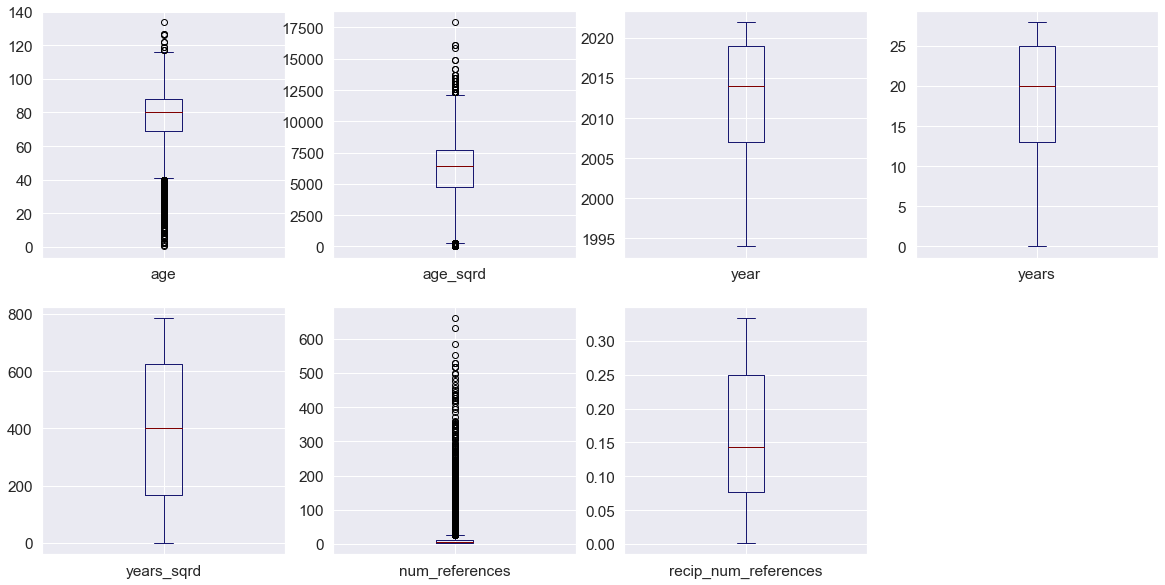

,outlier_count,percentage_outliers
num_references,6749,8.650
age,3267,4.190
age_sqrd,156,0.200
year,0,0.000
years,0,0.000
years_sqrd,0,0.000
recip_num_references,0,0.000


<IPython.core.display.Javascript object>

In [16]:
# Boxplots of numerical features to view outliers
columns = [
    "age",
    "age_sqrd",
    "year",
    "years",
    "years_sqrd",
    "num_references",
    "recip_num_references",
]
df[columns].plot.box(subplots=True, figsize=(20, 10), layout=(2, 4))
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[columns])

#### Observations:
- The remaining outliers for `age` and `age_squared` follow the trend in the data, so we are ready to drop the reference columns.

#### Dropping `info`, `info_parenth`,  `link`, and `year`

In [17]:
# Dropping info, info_parenth, and link
cols_to_drop = ["info", "info_parenth", "link", "year"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Re-check shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 78040 rows and 21 columns.


<IPython.core.display.Javascript object>

#### Confirming Remaining Columns

In [18]:
# Checking remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78040 entries, 0 to 78039
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             78040 non-null  int64   
 1   age                        78040 non-null  float64 
 2   sciences                   78040 non-null  int64   
 3   social                     78040 non-null  int64   
 4   spiritual                  78040 non-null  int64   
 5   academia_humanities        78040 non-null  int64   
 6   business_farming           78040 non-null  int64   
 7   arts                       78040 non-null  int64   
 8   sports                     78040 non-null  int64   
 9   law_enf_military_operator  78040 non-null  int64   
 10  politics_govt_law          78040 non-null  int64   
 11  crime                      78040 non-null  int64   
 12  event_record_other         78040 non-null  int64   
 13  num_categories             7804

<IPython.core.display.Javascript object>

#### Observations:
- After briefly revisiting EDA, we will proceed to treat missing values.

## EDA Revisited

### Summary Statistics

#### Numerical Features

In [19]:
# Summary Statistics of Numerical Features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_references,78040.000,12.646,21.292,3.000,4.000,7.000,13.000,660.000
age,78040.000,76.742,16.121,0.250,69.000,80.000,88.000,134.000
sciences,78040.000,0.089,0.285,0.000,0.000,0.000,0.000,1.000
social,78040.000,0.009,0.093,0.000,0.000,0.000,0.000,1.000
spiritual,78040.000,0.036,0.185,0.000,0.000,0.000,0.000,1.000
academia_humanities,78040.000,0.085,0.278,0.000,0.000,0.000,0.000,1.000
business_farming,78040.000,0.037,0.189,0.000,0.000,0.000,0.000,1.000
arts,78040.000,0.408,0.491,0.000,0.000,0.000,1.000,1.000
sports,78040.000,0.203,0.402,0.000,0.000,0.000,0.000,1.000
law_enf_military_operator,78040.000,0.051,0.220,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

#### Categorical Features

In [20]:
# Summary statistics of categorical features
df.describe(include="category").T

,count,unique,top,freq
region,77919,11,North America,32405
prior_region,78040,12,No Prior Region,73701
known_for,77662,12,arts,26074


<IPython.core.display.Javascript object>

#### Observations:
- Here, we are just having a quick check that the original and added features are what we expect them to be.
- After initial EDA, we have not done any additional treatment.
- Evertying is looking good, and we will glance at correlation, as well.

### Correlation

#### Pairplot of Numerical Features w.r.t. `known_for`

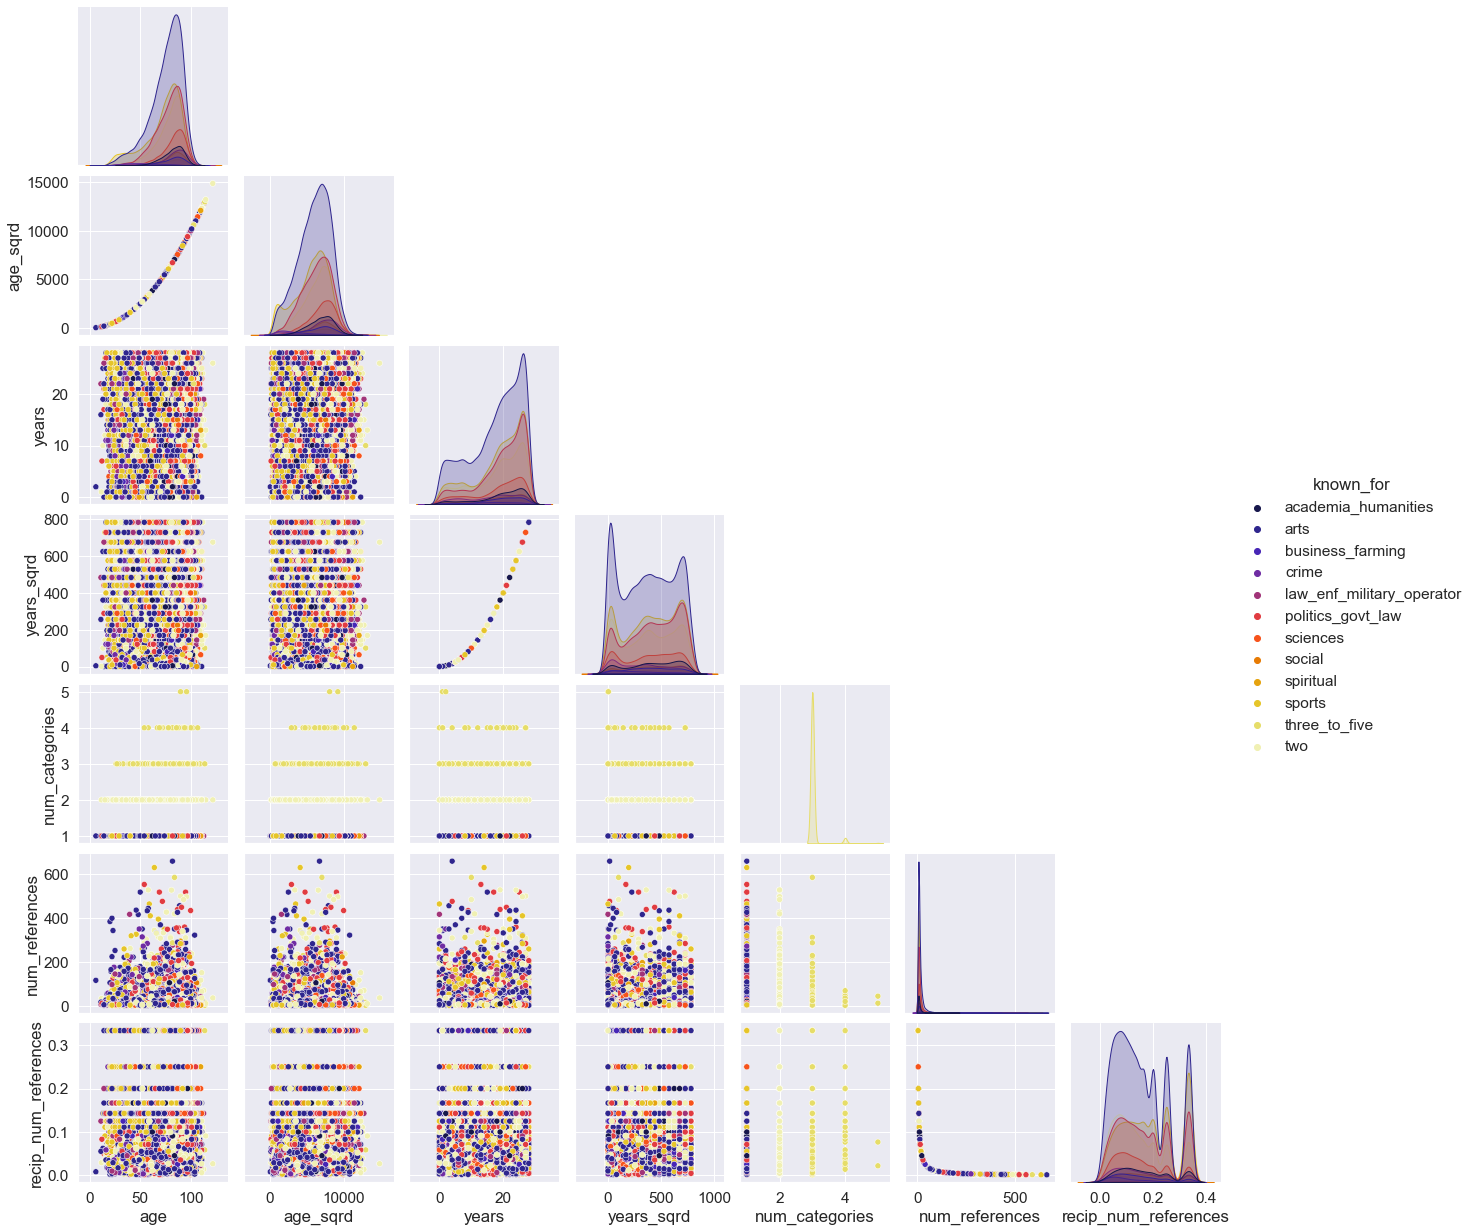

<IPython.core.display.Javascript object>

In [21]:
# Pairplot of numerical features
vars = [
    "age",
    "age_sqrd",
    "years",
    "years_sqrd",
    "num_categories",
    "num_references",
    "recip_num_references",
]
sns.pairplot(
    df, diag_kind="kde", corner=True, vars=vars, hue="known_for", palette="CMRmap"
)
plt.show()

#### Heatmap of Correlation of Numerical Features

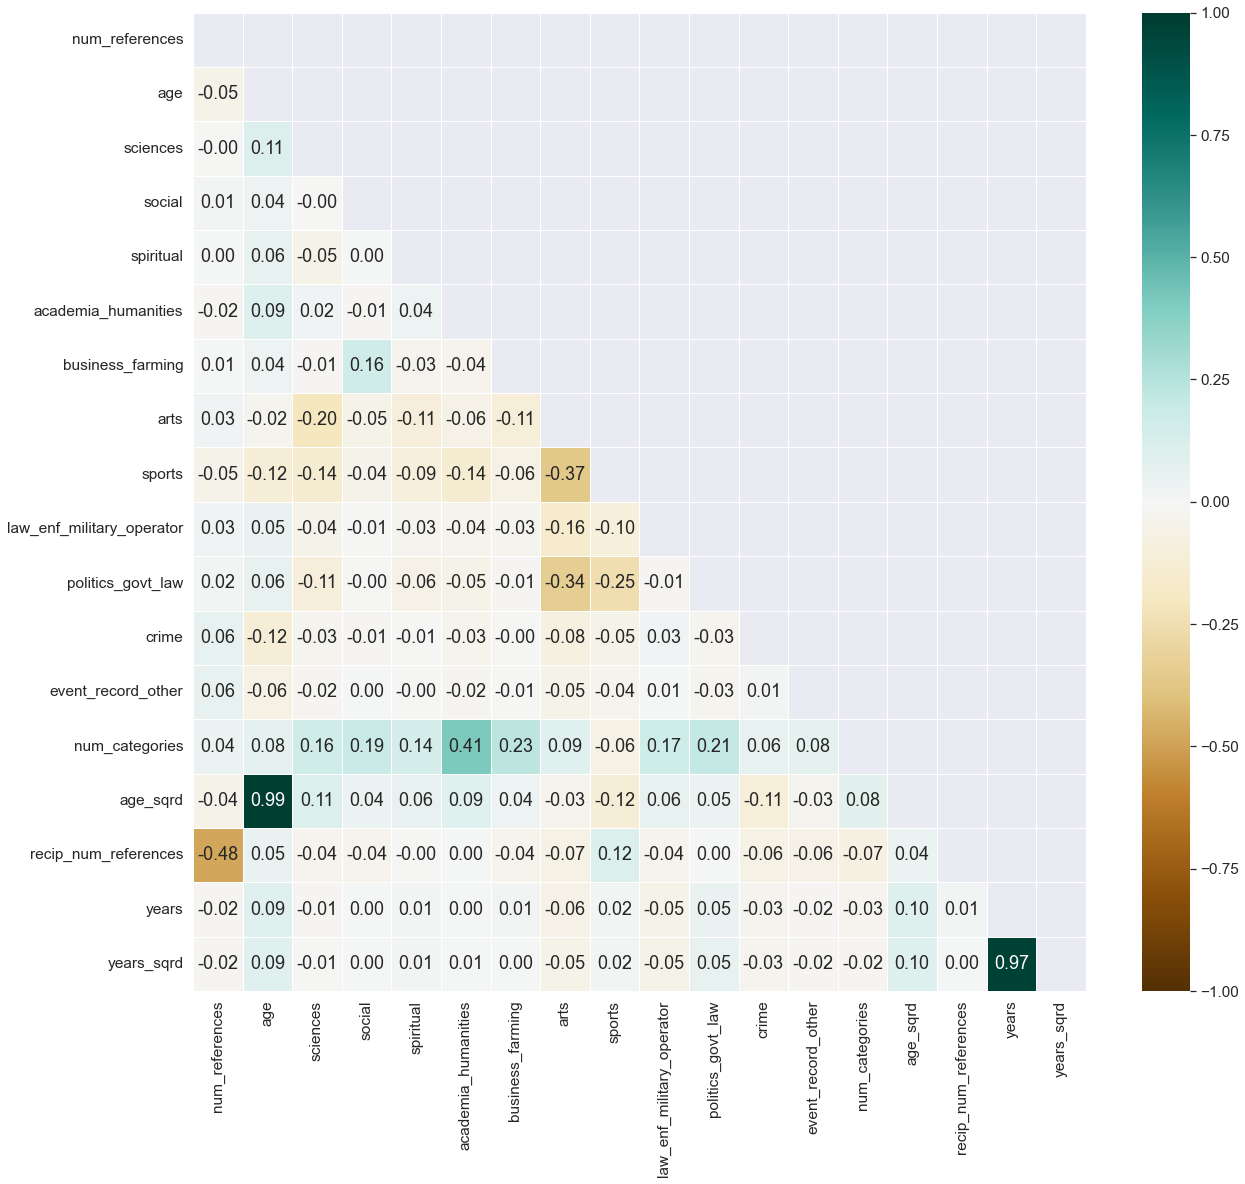

<IPython.core.display.Javascript object>

In [22]:
# Pairplot of numerical features
plt.figure(figsize=(20, 18))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    annot=True,
    fmt=(".2f"),
    annot_kws={"size": 18},
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    mask=mask,
    linewidth=1,
)
plt.show()

#### Observations:
- There is very little observable variation in the pairplot, which indicates we do not have any strong predictors.
- Likewise, there is essentially no correlation between the numerical features on the heatmap.
- We will move on to missing value treatment.

## Missing Values
There is only the one column, `region`, to treat.  However, we will proceed with the exercise of programmatically assessing missing values for any column.  

We will group entries by `known_for`, then impute missing `region` with the mode for the group.

### Imputation of Missing Values

#### Function to Return Columns with Missing Values and Their Missing Value Counts

In [23]:
# Define a function to return Series of columns of dataframe with null values and their null value counts
def null_count_4col(dataframe):
    """
    Takes input dataframe and returns Series of columns with missing values and their missing value counts
    """
    null_cols = dataframe.isnull().sum()[df.isnull().sum() > 0].index.to_list()
    if len(null_cols) > 0:
        return dataframe[null_cols].isnull().sum()
    else:
        print(
            f"There are {dataframe.isnull().sum().sum()} remaining missing values in the dataframe."
        )

<IPython.core.display.Javascript object>

#### Function to Make a List of Column Names with Missing Values

In [24]:
# Define a function to create list of columns with missing values
def null_cols(dataframe):
    """
    Takes input dataframe and returns list of column names that contain null values
    """
    null_cols = dataframe.isnull().sum()[dataframe.isnull().sum() > 0].index.to_list()
    return null_cols

<IPython.core.display.Javascript object>

#### Function to Impute Missing Values in a Dataframe by the Mode of Rows Grouped by Other Selected Columns

In [25]:
# Define a function to impute missing values in a dataframe by the median
# of rows grouped by other selected columns
def impute_mode(dataframe, groupby_lst, null_cols_lst):
    """
    A function to impute missing values in a dataframe by their column median
    of rows grouped by other selected columns
    
    dataframe: dataframe
    groupby_lst: columns to group by for calculating median for imputation
    null_cols_list: columns to have missing values treated with imputation
    """
    dataframe[null_cols_lst] = dataframe.groupby(groupby_lst)[null_cols_lst].transform(
        lambda x: x.fillna(x.mode().iloc[0])
    )
    return dataframe

<IPython.core.display.Javascript object>

#### Missing Values Before Treatment

In [26]:
# display missing values prior to imputation
null_count_4col(df)

region       121
known_for    378
dtype: int64

<IPython.core.display.Javascript object>

#### Imputing Missing Values

In [27]:
# Using above functions to impute missing values using mode of rows grouped by known_for
groupby_lst = ["known_for"]
null_cols_lst = null_cols(df)

impute_mode(df, groupby_lst, null_cols_lst)

null_count_4col(df)

region       378
known_for    378
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have treated the missing values.
- The additional functions were included here to illustrate an approach for a dataset with more columns with missing values.
- Missing mean or median values could be handled similarly and we will include the above treatment for the `test` set, but using the modes from `train`.
- Let us check our columns once more before exporting the dataset.

#### Confirming Final Columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78040 entries, 0 to 78039
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             78040 non-null  int64   
 1   age                        78040 non-null  float64 
 2   sciences                   78040 non-null  int64   
 3   social                     78040 non-null  int64   
 4   spiritual                  78040 non-null  int64   
 5   academia_humanities        78040 non-null  int64   
 6   business_farming           78040 non-null  int64   
 7   arts                       78040 non-null  int64   
 8   sports                     78040 non-null  int64   
 9   law_enf_military_operator  78040 non-null  int64   
 10  politics_govt_law          78040 non-null  int64   
 11  crime                      78040 non-null  int64   
 12  event_record_other         78040 non-null  int64   
 13  num_categories             7804

<IPython.core.display.Javascript object>

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Saving Dataset to [wp_life_expect_preproc.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv)

In [28]:
# Saving dataset to csv
df.to_csv("wp_life_expect_preproc.csv", index=False)

<IPython.core.display.Javascript object>

In [29]:
print("Complete")

# Chime notification when cell executes
chime.success()

Complete


<IPython.core.display.Javascript object>

# [Proceed to Linear Regression Model ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_olsmodel_thanak_2022_10_9.ipynb)